In [1]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
import DNSmodule as dns
from scipy.optimize import curve_fit



params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
#plt.style.use('ggplot')
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
plt.rc('font',family='serif')
#cols = ['#df1e36','#e62f44','#c9c900','#113f7e','#091f3f']
colours = ['#df1e36','#c9c900','#091f3f']
cols = ['#df1e36','#c9c900','#091f3f']
red  = cols[0]
yel  = cols[1]
blue = cols[2]

In [2]:
col_rock = sns.color_palette('rocket',11)[7]
col_mako = sns.color_palette('mako',11)[1]

/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


hyper/hyper_1024.b_1024_1e-06_1.spc
30.0
0.0
0.6296544918410992
2.518617967364397
10.074471869457588
39.27469892858856
hyper/hyper_1024.b_1024_1e-06_12.spc
30.0
0.0
0.6296544918410992
2.518617967364397
10.074471869457588
39.27469892858856


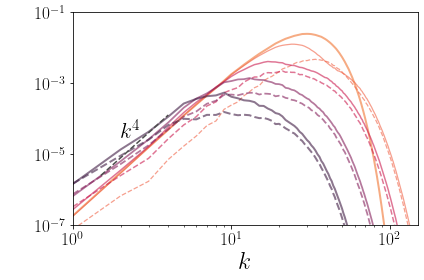

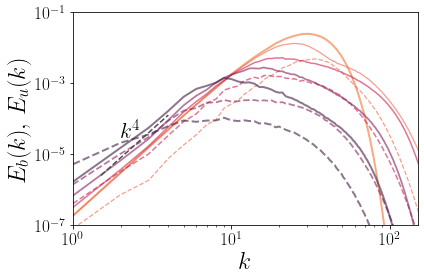

In [4]:
f_NH = ['hyper/hyper_1024.b_1024_1e-06_1.spc','hyper/hyper_1024.b_1024_1e-06_12.spc']
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
#idx_sort = np.argsort(viscs)
#ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
t = [0,8,32,128,499]
lws = np.linspace(1,2,len(t))

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []
labs = ['1e-06_Pm1','1e-06_Pm12']
for idx, f in enumerate(f_NH):
    print(f)
    fig, ax = plt.subplots()
    print(kps[idx])
    Bk = Bks[idx]
    Ek = Eks[idx]
    Pm = Pms[idx]
    T = Tbs[idx][0]
    t_T.append(t/T)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    U= Us[idx]
    Lu= Lus[idx]
    visc = viscs[idx]
    
   
    lab = labs[idx]
    for id_t,idx_t in enumerate(t):
        print(time[idx_t]/T)
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=2,ls='-',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],alpha = 0.6, ls = '-', lw = lws[id_t])
            ax.plot(k,Ek[idx_t],c=col_NH[id_t],alpha = 0.6, ls='--',lw = lws[id_t])
    k_slope = np.array([1.5,4])
    ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
    ax.text(2,3e-5,'$k^{4}$',size=22)
    k_slope = np.array([40,200])
    #ax.plot(k_slope,5*(1/np.power(k_slope,2)),c='0.3',ls='--')
    #ax.text(2,3e-5,'{}',size=22)
 
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('$E_b(k),\, E_u(k)$',size=24,c='k' if idx==1 else 'w')
    ax.set_xlabel('$k$',size=24)
    ax.set_ylim(1e-7,1e-1)
    ax.set_xlim(1,150)
    
    fig.tight_layout()
    fig.savefig('Eb_nh_{}_hyper_thesis.pdf'.format(lab),format='pdf')

/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


hyper/nh_hyper_zero_kp20.b_2048_2e-10_1.spc
30.0
0.0
0.6297724842300094
5.038179873840075
14.09115933464646


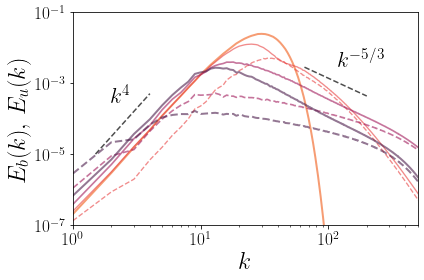

In [29]:
f_NH = ['hyper/nh_hyper_zero_kp20.b_2048_2e-10_1.spc']
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
#idx_sort = np.argsort(viscs)
#ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
t = [0,8,64,179]
lws = np.linspace(1,2,len(t))

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []
labs = ['2048']
for idx, f in enumerate(f_NH):
    print(f)
    fig, ax = plt.subplots()
    print(kps[idx])
    Bk = Bks[idx]
    Ek = Eks[idx]
    Pm = Pms[idx]
    T = Tbs[idx][0]
    t_T.append(t/T)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    U= Us[idx]
    Lu= Lus[idx]
    visc = viscs[idx]
    
   
    lab = labs[idx]
    for id_t,idx_t in enumerate(t):
        print(time[idx_t]/T)
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=2,ls='-',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],alpha = 0.6, ls = '-', lw = lws[id_t])
            ax.plot(k,Ek[idx_t],c=col_NH[id_t],alpha = 0.6, ls='--',lw = lws[id_t])
    k_slope = np.array([1.5,4])
    ax.plot(k_slope,2e-6*np.power(k_slope,4),c='0.3',ls='--')
    ax.text(2,3e-4,'$k^{4}$',size=22)
    k_slope = np.array([65,200])
    ax.plot(k_slope,3*(1/np.power(k_slope,5/3)),c='0.3',ls='--')
    ax.text(120,3e-3,'$k^{-5/3}$',size=22)
 
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('$E_b(k),\, E_u(k)$',size=24,c='k')
    ax.set_xlabel('$k$',size=24)
    ax.set_ylim(1e-7,1e-1)
    ax.set_xlim(1,500)
    
    fig.tight_layout()
    fig.savefig('Eb_nh_{}_hyper_thesis.pdf'.format(lab),format='pdf')

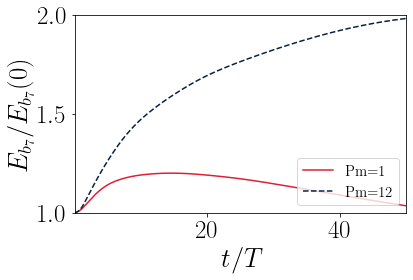

In [18]:

figE, axE0 = plt.subplots()


E_mhd_zero= dns.col_E(f_NH[0])
E_mhd_equi = dns.col_E(f_NH[1])


Ekb_mhd_zero = dns.B_spectrum(f_NH[0])
Ekb_mhd_equi = dns.B_spectrum(f_NH[1])

k2048 = np.arange(1,int(2048/3),1)



t_mhd_zero = dns.col_t(f_NH[0])


t_mhd_equi = dns.col_t(f_NH[1])



E3_mhd_zero = dns.integrate(Ekb_mhd_zero,0,8,k2048)
E3_mhd_equi = dns.integrate(Ekb_mhd_equi,0,8,k2048)


axE0.plot(t_mhd_zero[:-1]/0.1, E3_mhd_zero/E3_mhd_zero[0], color=red,ls='-',label='Pm=1')
axE0.plot(t_mhd_equi[:-1]/0.1, E3_mhd_equi/E3_mhd_equi[0], color=blue,ls='--',label='Pm=12')

    
    
#axE.set_xscale('log')
#axE0.set_yscale('log')
axE0.set_ylabel('$E_{b_7}/E_{b_7}(0)$')
axE0.set_xlabel('$t/T$')


axE0.set_xlim(1e-1,50)
axE0.set_ylim(1,2)

axE0.legend(loc=4)
figE.tight_layout()
#figE.savefig('E7_vs_t_comparison_MHD_HD_thesis.pdf',format='pdf')

plt.show()